In [4]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
base = pd.read_csv("../../Arquivos/AirPassengers.csv")

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

base = pd.read_csv('../../Arquivos/AirPassengers.csv', parse_dates= ['Month'],
                   index_col='Month', date_parser=dateparse)
ts = base['#Passengers']

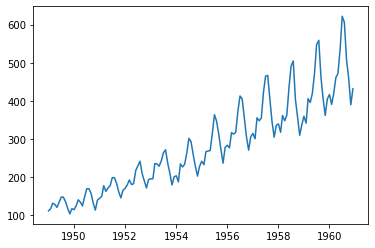

In [7]:
plt.plot(ts)

In [8]:
#Criação do modelo ARIMA com os parâmetro p = 2, q = 1, d = 2, treinamento e visualização
modelo = ARIMA(ts, order=(2,1,2),freq=ts.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Sat, 01 Aug 2020   AIC                           1344.043
Time:                        22:33:21   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5313      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9097      0.065    -29.480      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9996      0.068     14.794      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [10]:
#Previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps=12)[0]
previsoes


array([433.13004398, 450.9116112 , 479.8452208 , 512.01134645,
       539.36210538, 555.83889906, 558.77762005, 549.29825297,
       531.66893537, 511.90381288, 496.03103066, 488.51398927])

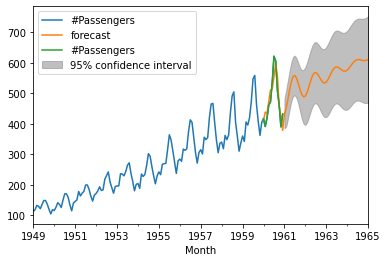

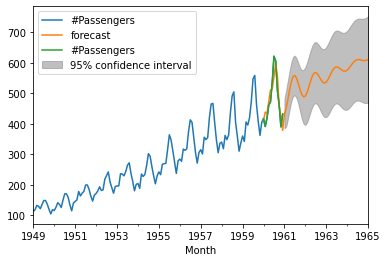

In [11]:
#criação de eixo para a serie temporal completa, com adição das previsões do modelo
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01','1965-01-01',
                             ax=eixo, plot_insample=True)


In [13]:
#implementação do auto arima para descobertas automática dos parâmetros
modelo_auto = auto_arima(ts, n=12, seasonal=True, trace=False)
modelo_auto.summary()

C:\Users\rafa_\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\rafa_\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rafa_\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rafa_\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rafa_\anaconda3\lib\site-pack

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -663.692
Date:                Sat, 01 Aug 2020   AIC                           1343.385
Time:                        22:44:25   BIC                           1367.087
Sample:                             0   HQIC                          1353.016
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2552      0.389      3.230      0.001       0.494       2.017
ar.L1          0.7744      0.093      8.312      0.000       0.592       0.957
ar.L2          0.5145      0.147      3.501      0.000       0.226       0.803
ar.L3         -0.7763      0.092     -8.482      0.000      -0.956      -0.597
ma.L1         -0.8941     19.634     -0.046      0.964     -39.376      37.588
ma.L2         -0.9111     37.172     -0.025      0.980     -73.767      71.945
ma.L3          0.9830     19.282      0.051      0.959     -36.810      38.776
sigma2       587.8581   1.15e+04      0.051      0.959    -2.2e+04    2.31e+04
===================================================================================
Ljung-Box (Q):                      310.33   Jarque-Bera (JB):                 3.38
Prob(Q):                              0.00   Prob(JB):                         0.18
Heteroskedasticity (H):               6.97   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
proximos_12 = modelo_auto.predict(n_periods=12)

proximos_12

array([457.9204608 , 453.39431328, 497.57128049, 510.58505463,
       548.16049733, 550.91498234, 563.53396311, 546.80940689,
       539.46832635, 516.63831654, 509.42069002, 499.03923984])